In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Patient-Recovery-Prediction-Challenge/sample_submission.csv
/kaggle/input/Patient-Recovery-Prediction-Challenge/train.csv
/kaggle/input/Patient-Recovery-Prediction-Challenge/test.csv


Training data shape: (8000, 7)

--- Data Info (Checking for types and missing values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    8000 non-null   int64 
 1   Therapy Hours         8000 non-null   int64 
 2   Initial Health Score  8000 non-null   int64 
 3   Lifestyle Activities  8000 non-null   object
 4   Average Sleep Hours   8000 non-null   int64 
 5   Follow-Up Sessions    8000 non-null   int64 
 6   Recovery Index        8000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 437.6+ KB
None

--- Statistical Summary (Checking for ranges and outliers) ---
                 Id  Therapy Hours  Initial Health Score  Average Sleep Hours  \
count   8000.000000    8000.000000           8000.000000          8000.000000   
mean    5012.506875       4.983250             69.531000             6.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


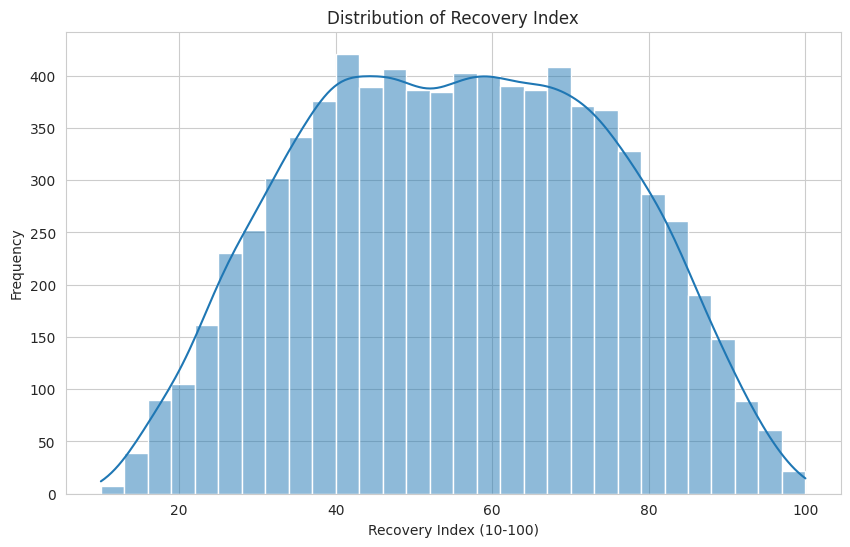

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style('whitegrid')

# --- Load the Data ---
# Make sure your CSV files are in the same directory, or provide the full path
try:
    train_df = pd.read_csv('/kaggle/input/Patient-Recovery-Prediction-Challenge/train.csv') # Assuming the training file is train.csv
    test_df = pd.read_csv('/kaggle/input/Patient-Recovery-Prediction-Challenge/test.csv')   # Assuming the test file is test.csv
    
    # Let's also look at the 'id' or 'patient_id' column if it exists
    # If your dataset has an ID column, replace 'id' with the actual column name
    # if 'id' in train_df.columns:
    #     print(f"Training data has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
    #     print(f"Test data has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")
    # else:
    #     print("Please replace 'id' with your dataset's ID column name for a full check.")
    
    print(f"Training data shape: {train_df.shape}")
    
except FileNotFoundError:
    print("Error: train.csv or test.csv not found.")
    print("Please make sure the files are in the correct directory.")
    # Exit or stop execution if files aren't loaded
    # In a notebook, you'd just see this error.
    
# --- 1. Initial Inspection (Info & Missing Values) ---
print("\n--- Data Info (Checking for types and missing values) ---")
print(train_df.info())

# --- 2. Statistical Summary ---
print("\n--- Statistical Summary (Checking for ranges and outliers) ---")
print(train_df.describe())

# --- 3. Categorical Feature Check ---
print("\n--- Categorical Feature ('Lifestyle Activities') Counts ---")
print(train_df['Lifestyle Activities'].value_counts())

# --- 4. Target Variable Analysis ---
print("\n--- Plotting Target Variable (Recovery Index) ---")
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Recovery Index'], kde=True, bins=30)
plt.title('Distribution of Recovery Index')
plt.xlabel('Recovery Index (10-100)')
plt.ylabel('Frequency')
plt.show()

--- Processed Data Head ---
   Therapy Hours  Initial Health Score  Lifestyle Activities  \
0              5                    49                     0   
1              2                    48                     1   
2              2                    81                     0   
3              2                    46                     0   
4              8                    47                     0   

   Average Sleep Hours  Follow-Up Sessions  Recovery Index  
0                    7                   5              36  
1                    7                   6              25  
2                    7                   2              59  
3                    6                   1              22  
4                    9                   0              40  

--- Plotting Correlation Heatmap ---


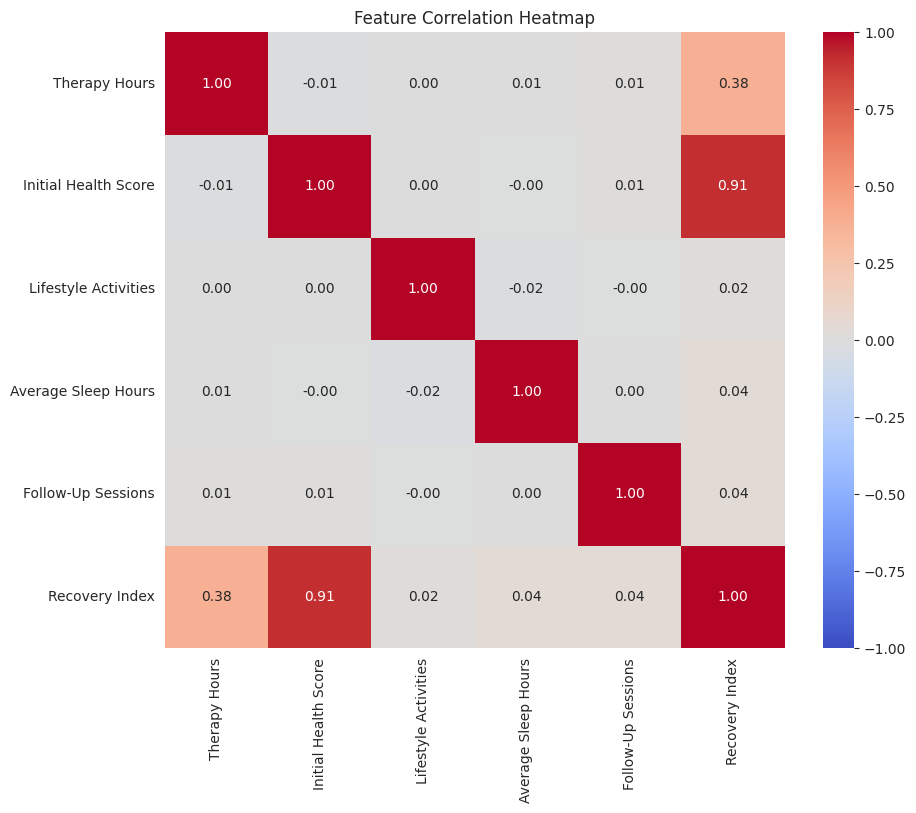


--- Plotting Feature vs. Target ---


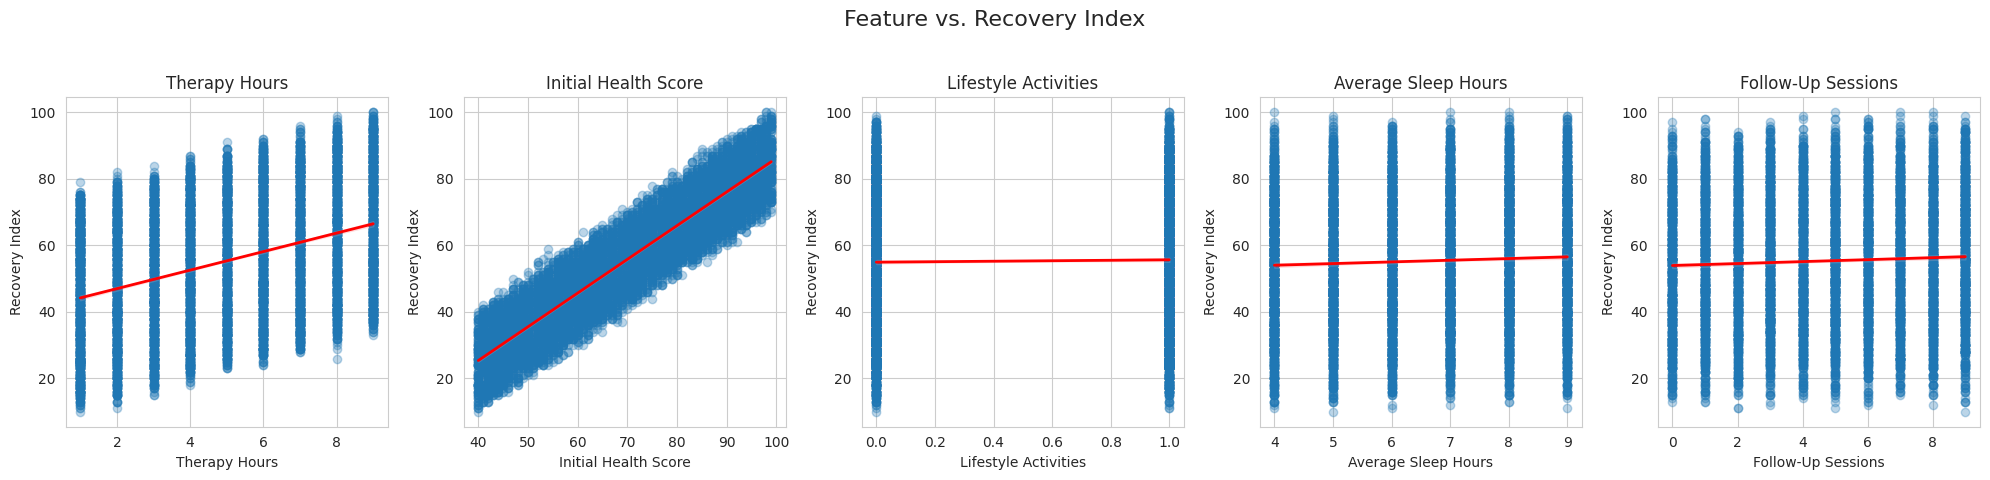

In [2]:
# --- 1. Preprocessing ---

# Drop the 'Id' column as it's not a feature
try:
    train_df_processed = train_df.drop('Id', axis=1)
    
    # Also drop from the test set (it will have an 'Id' column too)
    # We must apply all the same steps to the test set
    test_df_processed = test_df.drop('Id', axis=1) 
    
except KeyError:
    print("Warning: 'Id' column not found. It might have been dropped already.")
    train_df_processed = train_df.copy() # Use the original df
    test_df_processed = test_df.copy()

# Encode 'Lifestyle Activities' (Yes=1, No=0)
train_df_processed['Lifestyle Activities'] = train_df_processed['Lifestyle Activities'].map({'Yes': 1, 'No': 0})
test_df_processed['Lifestyle Activities'] = test_df_processed['Lifestyle Activities'].map({'Yes': 1, 'No': 0})

print("--- Processed Data Head ---")
print(train_df_processed.head())

# --- 2. Correlation Analysis ---

print("\n--- Plotting Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix
corr_matrix = train_df_processed.corr()
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


# --- 3. Feature vs. Target Scatter Plots ---

print("\n--- Plotting Feature vs. Target ---")
# Get all feature names (all columns except the target)
features = train_df_processed.columns.drop('Recovery Index')

# Create a grid of plots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))
fig.suptitle('Feature vs. Recovery Index', fontsize=16)

for i, col in enumerate(features):
    # Use regplot to add a regression line, which helps see the trend
    sns.regplot(ax=axes[i], data=train_df_processed, x=col, y='Recovery Index', 
                line_kws={"color": "red", "lw": 2}, scatter_kws={'alpha':0.3})
    axes[i].set_title(f'{col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# --- 1. Feature Engineering ---
print("--- Creating new features ---")

# We apply this to both train and test dataframes

for df in [train_df_processed, test_df_processed]:

    # --- Your Proven Winners ---
    df['Health_Score_Squared'] = df['Initial Health Score']**2
    df['Interaction_Therapy_Health'] = df['Initial Health Score'] * df['Therapy Hours']



print("Focused features created. New columns:")
print(train_df_processed.columns)



# --- 2. Define Features (X) and Target (y) ---
# The target is 'Recovery Index'
y = train_df_processed['Recovery Index']
# The features are all columns EXCEPT 'Recovery Index'
X = train_df_processed.drop('Recovery Index', axis=1)

# We must have the same columns in the test set (minus the target)
X_test_final = test_df_processed[X.columns] # Ensure column order is the same


# --- 3. Split the Data ---
# We split our training data to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


# --- 4. Feature Scaling ---
# We scale the data for Linear Regression
# We 'fit' the scaler ONLY on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# We 'transform' the validation and final test data using the *same* scaler
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)


# --- 5. Train & Evaluate Models ---

# --- Model 1: Linear Regression ---
print("\n--- Training Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
lr_preds = lr_model.predict(X_val_scaled)

# Calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))
print(f"Linear Regression Validation RMSE: {lr_rmse:.4f}")


# --- Model 2: Random Forest Regressor ---
print("\n--- Training Random Forest ---")
# Tree models don't need scaled data, but we can use it, it doesn't hurt.
# Let's use the unscaled data for clarity.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_preds = rf_model.predict(X_val)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))
print(f"Random Forest Validation RMSE: {rf_rmse:.4f}")

# Bonus: Check Feature Importance from Random Forest
print("\n--- Random Forest Feature Importances ---")
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

--- Creating new features ---
Focused features created. New columns:
Index(['Therapy Hours', 'Initial Health Score', 'Lifestyle Activities',
       'Average Sleep Hours', 'Follow-Up Sessions', 'Recovery Index',
       'Health_Score_Squared', 'Interaction_Therapy_Health'],
      dtype='object')

Training set shape: (6400, 7)
Validation set shape: (1600, 7)

--- Training Linear Regression ---
Linear Regression Validation RMSE: 2.0059

--- Training Random Forest ---
Random Forest Validation RMSE: 2.2890

--- Random Forest Feature Importances ---
Initial Health Score          0.424075
Health_Score_Squared          0.363402
Interaction_Therapy_Health    0.202033
Follow-Up Sessions            0.004675
Average Sleep Hours           0.004392
Lifestyle Activities          0.001174
Therapy Hours                 0.000249
dtype: float64


In [27]:
# 1. Define the features you want to KEEP
top_features = [
    'Initial Health Score',
    'Interaction_Therapy_Health',
    'Therapy Hours'
]

# 2. For the test set, just select these features
test_df_processed = test_df_processed[top_features]

# 3. For the training set, select these features + your target
train_features_to_keep = top_features + ['Recovery Index']
train_df_processed = train_df_processed[train_features_to_keep]


print("--- Noisy features dropped ---")
print("\nNew columns in train_df_processed:")
print(train_df_processed.columns)

--- Noisy features dropped ---

New columns in train_df_processed:
Index(['Initial Health Score', 'Interaction_Therapy_Health', 'Therapy Hours',
       'Recovery Index'],
      dtype='object')


In [4]:
# --- Imports for RandomForest ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

# --- Settings ---
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# --- 1. Load Data ---
print("--- Loading Data ---")
try:
    train_df = pd.read_csv('/kaggle/input/Patient-Recovery-Prediction-Challenge/train.csv')
    test_df = pd.read_csv('/kaggle/input/Patient-Recovery-Prediction-Challenge/test.csv')
    
    print(f"Training data shape: {train_df.shape}")
    print(f"Test data shape: {test_df.shape}")
    
    # Store test IDs for submission
    test_ids = test_df['Id']
    
except FileNotFoundError:
    print("Error: train.csv or test.csv not found. Please check file paths.")
    # Exit or stop if data wasn't loaded
    raise

# --- 2. Preprocessing Setup ---
print("\n--- Setting up Preprocessing ---")

# Define target (y) and features (X)
X = train_df.drop(['Recovery Index', 'Id'], axis=1)
y = train_df['Recovery Index']
X_test_final = test_df.drop('Id', axis=1)

# Identify feature types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- 3. Train-Validation Split ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")

# --- 4. Model 1: Tuned RandomForestRegressor ---
print("\n--- Tuning RandomForestRegressor ---")

# Create the full pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define a parameter grid for RandomizedSearchCV
rf_param_grid = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', 1.0]
}

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the random search
rf_random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = rf_random_search.best_estimator_
print("\nBest RandomForest Parameters:")
print(rf_random_search.best_params_)

# --- 5. Evaluation ---
print("\n--- RandomForest Evaluation on Validation Set ---")

y_pred_rf = best_rf_model.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE):     {mae_rf:.4f}")
print(f"R-squared (R²):                {r2_rf:.4f}")

# --- 6. Create RandomForest Submission ---
print("\n--- Creating RandomForest Submission File ---")

# Predict on the actual test data
final_predictions_rf = best_rf_model.predict(X_test_final)

# Post-process predictions: Clip to 10-100 range and round to integer
final_predictions_rf = np.clip(final_predictions_rf, 10, 100)
final_predictions_rf = np.round(final_predictions_rf).astype(int)

# Create submission DataFrame
submission_rf = pd.DataFrame({
    'Id': test_ids,
    'Recovery Index': final_predictions_rf
})

# Save to CSV
submission_rf.to_csv('submission_randomforest.csv', index=False)
print("Successfully created 'submission_randomforest.csv'!")
print(submission_rf.head())

--- Loading Data ---
Training data shape: (8000, 7)
Test data shape: (2000, 6)

--- Setting up Preprocessing ---
Numerical features: ['Therapy Hours', 'Initial Health Score', 'Average Sleep Hours', 'Follow-Up Sessions']
Categorical features: ['Lifestyle Activities']
Train features shape: (6400, 5)
Validation features shape: (1600, 5)

--- Tuning RandomForestRegressor ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best RandomForest Parameters:
{'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 1.0, 'model__max_depth': None}

--- RandomForest Evaluation on Validation Set ---
Root Mean Squared Error (RMSE): 2.1774
Mean Absolute Error (MAE):     1.7275
R-squared (R²):                0.9872

--- Creating RandomForest Submission File ---
Successfully created 'submission_randomforest.csv'!
     Id  Recovery Index
0  6253              56
1  4685              23
2  1732              48
3  4743              30
4  45